In [3]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing

df = pd.read_csv('econ_df_2.csv')
df.head()

,Unnamed: 0,employed,mental_illness,disabled,with_parents,months_gap,welfare_income,food_stamp,section_8,Household_Income
0,0,0,0,0,0,24,0,0,0,"$25,000-$49,999"
1,1,1,1,0,0,1,0,0,0,"$50,000-$74,999"
2,2,1,0,0,0,0,0,0,0,"$150,000-$174,999"
3,3,0,0,0,1,11,0,0,0,"$25,000-$49,999"
4,4,1,1,1,0,33,30,0,0,"$25,000-$49,999"


In [7]:
df['Household_Income'].drop_duplicates()

0        $25,000-$49,999
1        $50,000-$74,999
2      $150,000-$174,999
5              $0-$9,999
6      $100,000-$124,999
9      $125,000-$149,999
15       $10,000-$24,999
21       $75,000-$99,999
29             $200,000+
123    $175,000-$199,999
Name: Household_Income, dtype: object

In [9]:
from sklearn import tree
X = df.drop(columns="Household_Income")
y = df["Household_Income"].values.reshape(-1, 1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)


KeyError: 5

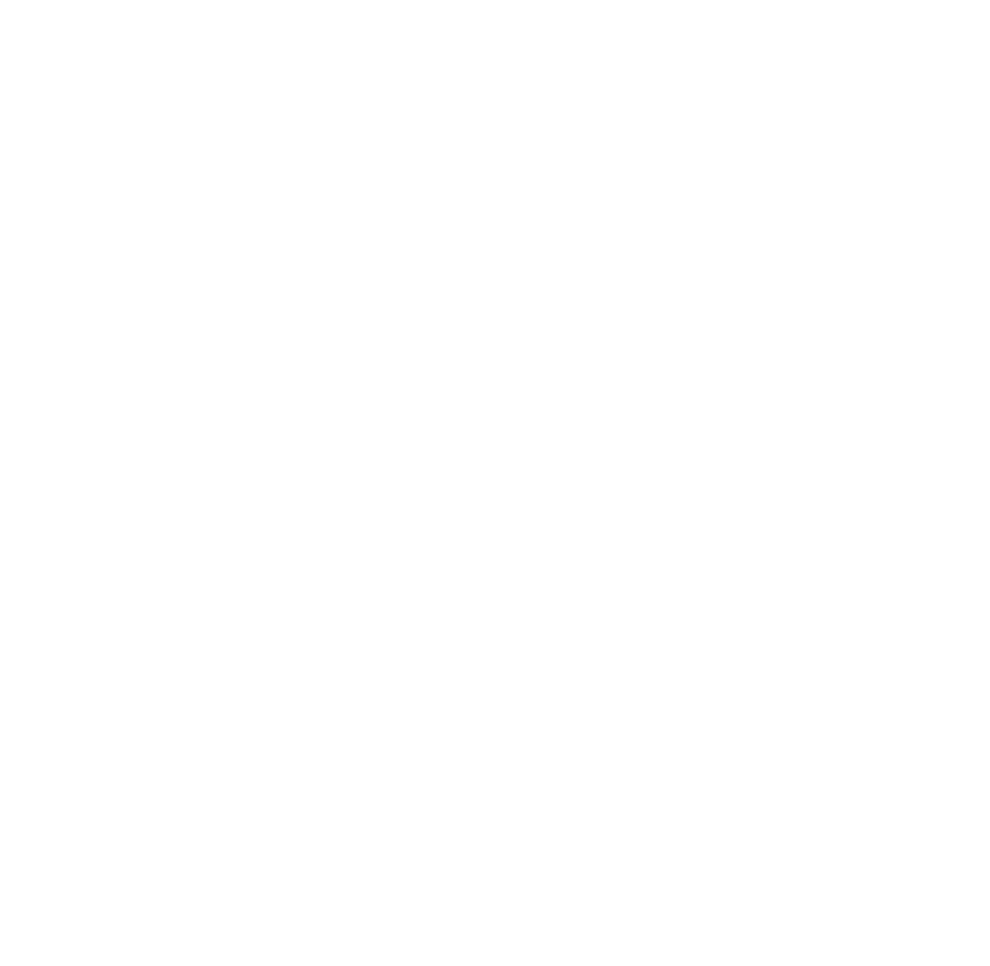

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
              feature_names = X,
              class_names=y,
              filled = True)
# fig.savefig('imagename.png')

plt.figure(figsize=(120, 120))
tree.plot_tree(clf)

In [19]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
labelencoder = LabelEncoder()
labelencoder.fit(y)

y_encoded = labelencoder.transform(y)
y_categorical = to_categorical(y_encoded)

Using TensorFlow backend.
C:\Users\jason\Anaconda3\envs\jasonsWorld\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jason\Anaconda3\envs\jasonsWorld\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X, y_encoded)
clf2.predict(y_encoded)

ValueError: Expected 2D array, got 1D array instead:
array=[7. 8. 4. 7. 7. 0. 2. 2. 8. 3. 0. 8. 7. 8. 4. 1. 0. 8. 0. 2. 7. 9. 7. 3.
 7. 8. 9. 2. 4. 6. 7. 7. 0. 7. 6. 9. 8. 0. 0. 7. 7. 9. 6. 7. 1. 0. 7. 0.
 2. 7. 7. 3. 6. 4. 6. 6. 9. 6. 2. 9. 2. 7. 7. 9. 8. 8. 8. 9. 9. 3. 4. 1.
 7. 3. 2. 2. 6. 9. 1. 9. 7. 7. 9. 8. 4. 8. 2. 2. 9. 8. 7. 3. 9. 8. 8. 8.
 8. 0. 6. 9. 3. 7. 8. 6. 7. 6. 6. 3. 7. 2. 1. 6. 9. 1. 1. 6. 4. 7. 3. 7.
 0. 8. 7. 5. 9. 2. 8. 6. 8. 7. 7. 6. 4. 8. 4. 2. 9. 2. 7. 6. 8. 3. 0. 8.
 3. 1. 7. 2. 0. 8. 9. 7. 7. 1. 8. 8. 8. 7. 9. 8. 3. 7. 0. 8. 1. 4. 0. 7.
 1. 8. 8. 3. 1. 7. 9. 0. 2. 1. 0. 1. 9. 1. 7. 1. 9. 7. 1. 7. 7. 4. 7. 8.
 1. 2. 9. 7. 8. 7. 8. 7. 7. 3. 0. 9. 7. 7. 0. 4. 8. 7. 6. 9. 7. 1. 1. 8.
 1. 7. 8. 1. 6. 4. 6. 0. 7. 4. 9. 9. 2. 8. 0. 8. 7. 8. 7. 2. 1. 3. 1. 7.
 8. 2. 8. 1. 1. 8. 9. 1. 8. 7. 8. 7. 1. 7. 7. 0. 2. 1. 8. 1. 7. 8. 8. 8.
 8. 8. 9. 0. 1. 0. 8. 7. 1. 0. 1. 9. 2. 9. 7. 7. 7. 0. 8. 8. 5. 7. 7. 3.
 2. 9. 7. 8. 8. 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.